In [191]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, pi, round
from numpy.linalg import inv
from numpy.linalg import matrix_rank as rank
!rm bug_numpy_utils.py # just in case
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
from bug_numpy_utils import MatPrint, CData

--2023-11-23 17:57:31--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14157 (14K) [text/plain]
Saving to: ‘bug_numpy_utils.py’

bug_numpy_utils.py  100%[===================>]  13.83K  --.-KB/s    in 0s      

2023-11-23 17:57:31 (35.2 MB/s) - ‘bug_numpy_utils.py’ saved [14157/14157]



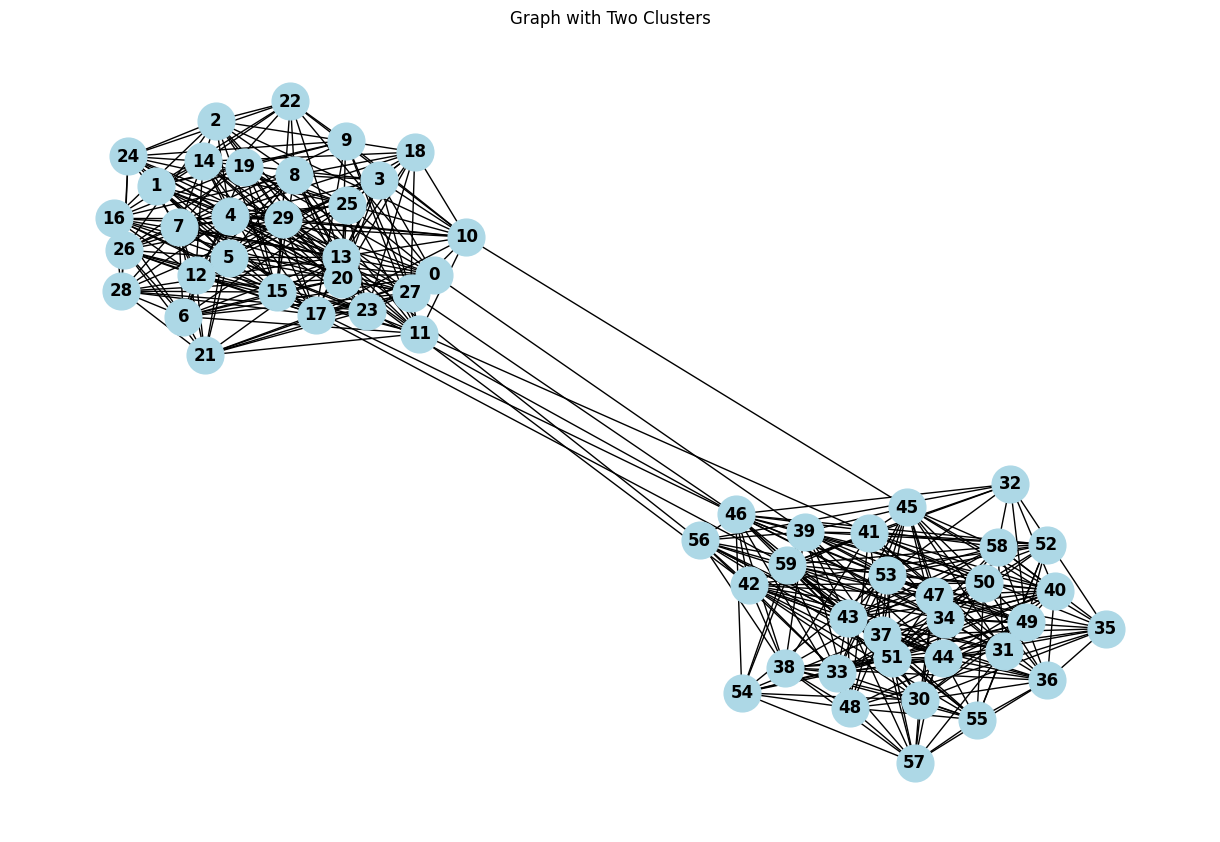

In [192]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph with a fairly complex structure but with two distinct clusters
n_nodes_cluster1 = 30  # Number of nodes in the first cluster
n_nodes_cluster2 = 30  # Number of nodes in the second cluster

# Create two subgraphs representing the two clusters
G1 = nx.erdos_renyi_graph(n_nodes_cluster1, 0.5)
G2 = nx.erdos_renyi_graph(n_nodes_cluster2, 0.5)

# Renaming nodes of G2 to avoid overlap with G1
mapping = {node: node + n_nodes_cluster1 for node in G2.nodes()}
G2 = nx.relabel_nodes(G2, mapping)

# Joining the two clusters into a single graph
G = nx.disjoint_union(G1, G2)

# Adding some edges between the clusters to make the structure more complex
for _ in range(10):
    node1 = np.random.choice(G1.nodes())
    node2 = np.random.choice(G2.nodes())
    G.add_edge(node1, node2)

# # Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.title("Graph with Two Clusters")
plt.show()



In [193]:
# Compute the adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G)

# Convert the adjacency matrix to a dense format for display
adjacency_matrix_dense = adjacency_matrix.todense()
MatPrint(adjacency_matrix_dense)

Matrix:
|     0.00     0.00     0.00     1.00     1.00     1.00     1.00     1.00     0.00     0.00     0.00     0.00     1.00     0.00     0.00     0.00     0.00     1.00     0.00     1.00     0.00     1.00     1.00     1.00     0.00     1.00     0.00     0.00     0.00     1.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     1.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 |
|     0.00     0.00     0.00     0.00     0.00     1.00     0.00     0.00     0.00     1.00     0.00     0.00     1.00     1.00     1.00     1.00     0.00     1.00     0.00     1.00     1.00     0.00     1.00     0.00     0.00     0.00     0.00     1.00     0.00     1.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0

In [194]:
# Obtain the degrees of each node
degrees = [deg for node, deg in nx.degree(G)]

# Create the degree matrix as a diagonal matrix
degree_matrix = np.diag(degrees)


MatPrint(degree_matrix)

Matrix:
|    14.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 |
|     0.00    12.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0

In [195]:
# computing the laplacian of the graph
Laplacian = degree_matrix - adjacency_matrix_dense
MatPrint(Laplacian)

Matrix:
|    14.00     0.00     0.00    -1.00    -1.00    -1.00    -1.00    -1.00     0.00     0.00     0.00     0.00    -1.00     0.00     0.00     0.00     0.00    -1.00     0.00    -1.00     0.00    -1.00    -1.00    -1.00     0.00    -1.00     0.00     0.00     0.00    -1.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00    -1.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00 |
|     0.00    12.00     0.00     0.00     0.00    -1.00     0.00     0.00     0.00    -1.00     0.00     0.00    -1.00    -1.00    -1.00    -1.00     0.00    -1.00     0.00    -1.00    -1.00     0.00    -1.00     0.00     0.00     0.00     0.00    -1.00     0.00    -1.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0

In [196]:
# computing the eigen values and eigen vectors of the laplcian of the graph
eigenvalues, eigenvectors = np.linalg.eig(Laplacian)

In [197]:
print(f"These are the eigen values: \n")
print(eigenvalues)

print("\n")
print(f"These are the eigen vectors: \n")
MatPrint(eigenvectors[0:5,0:5])

These are the eigen values: 

[-1.66533454e-15  5.31995006e-01  2.34892442e+01  2.32063987e+01
  8.14398073e+00  8.35333441e+00  2.28203665e+01  9.13706644e+00
  9.62599700e+00  2.17175304e+01  2.13323436e+01  1.01823862e+01
  1.04465062e+01  1.05885376e+01  1.09550581e+01  2.09937942e+01
  2.07650928e+01  1.12329091e+01  2.04796481e+01  2.02378087e+01
  2.01143508e+01  1.16961813e+01  1.18070919e+01  1.20084881e+01
  1.21876907e+01  1.95792726e+01  1.25008907e+01  1.26839344e+01
  1.27349305e+01  1.31594548e+01  1.33478091e+01  1.35958321e+01
  1.37640031e+01  1.38880310e+01  1.39937178e+01  1.90882294e+01
  1.89651487e+01  1.88395338e+01  1.87361920e+01  1.85009706e+01
  1.81700118e+01  1.79361096e+01  1.80295643e+01  1.77231254e+01
  1.44118742e+01  1.45275548e+01  1.46632269e+01  1.47288405e+01
  1.52024998e+01  1.71762632e+01  1.70482457e+01  1.68449726e+01
  1.54238118e+01  1.56201661e+01  1.57383960e+01  1.59266340e+01
  1.60890411e+01  1.65788772e+01  1.64109251e+01  1.63181089

Lets sort the eigen values in ascending order

In [198]:
eigenvalue_sorted = np.sort(eigenvalues)
print(eigenvalue_sorted)
# we can observe that the first eigen value is 0 and only one eigen value is 0 showing that the graph is connected

[-1.66533454e-15  5.31995006e-01  8.14398073e+00  8.35333441e+00
  9.13706644e+00  9.62599700e+00  1.01823862e+01  1.04465062e+01
  1.05885376e+01  1.09550581e+01  1.12329091e+01  1.16961813e+01
  1.18070919e+01  1.20084881e+01  1.21876907e+01  1.25008907e+01
  1.26839344e+01  1.27349305e+01  1.31594548e+01  1.33478091e+01
  1.35958321e+01  1.37640031e+01  1.38880310e+01  1.39937178e+01
  1.44118742e+01  1.45275548e+01  1.46632269e+01  1.47288405e+01
  1.52024998e+01  1.54238118e+01  1.56201661e+01  1.57383960e+01
  1.59266340e+01  1.60890411e+01  1.63181089e+01  1.64109251e+01
  1.65788772e+01  1.68449726e+01  1.70482457e+01  1.71762632e+01
  1.77231254e+01  1.79361096e+01  1.80295643e+01  1.81700118e+01
  1.85009706e+01  1.87361920e+01  1.88395338e+01  1.89651487e+01
  1.90882294e+01  1.95792726e+01  2.01143508e+01  2.02378087e+01
  2.04796481e+01  2.07650928e+01  2.09937942e+01  2.13323436e+01
  2.17175304e+01  2.28203665e+01  2.32063987e+01  2.34892442e+01]


Lets divide the data into 2 clusters since it seems quite apparent from the graph. we will choose K-1 eigen vectors

In [199]:
eig_1 = eigenvectors[:,0]
eig_2 = eigenvectors[:,1]

R = np.vstack ( (np.transpose(eig_1), np.transpose(eig_2)))
MatPrint(R)
print(R.shape)

Matrix:
|     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13     0.13 |
|    -0.12    -0.13    -0.13    -0.13    -0.13    -0.13    -0.13    -0.13    -0.13    -0.13    -0.12    -0.12    -0.13    -0.12    -0.13    -0.12    -0.13    -0.12    -0.13    -0.13    -0.12    -0.13    -0.14    -0.12    -0.14    -0.13    -0.13    -0.12    -0.13    -0.13     0.13     0.13     0.13     0.13     0.13     0.14     0.14     0.13     0.13     0.12     0.13     0.12     0.12     0.13     0.13     0.12     0.10     0.13     0.13     0

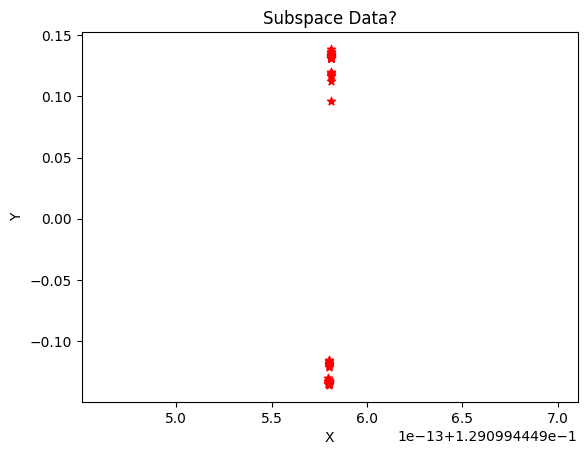

In [200]:
CData(R)

In [201]:
# Now performing Kmeans to cluster the data points together
random_index1 = np.random.randint(0, R.shape[1])
random_index2 = np.random.randint(0, R.shape[1])
print(f"This is the random index 1 {random_index1}")
print(f"This is the random index 2 {random_index2}")
# Choose an initial Centroid for the Data
g1 = R[:,random_index1]
g2 = R[:,random_index2]

MatPrint(g1)
MatPrint(g2)

This is the random index 1 4
This is the random index 2 37
Matrix:
[ 0.12909944 -0.13306671]
Matrix:
[0.12909944 0.13135723]


In [202]:
max_iteration = 10;
for i in range(max_iteration):
  cluster1 = np.empty((2,0))
  cluster2 = np.empty((2,0))
  for j in range(len(R[1])):
    point_in_data = R[:,j]
    # print("this is j ", j)
    # print("This is g1 " , g1, "\n")
    # print("This is point_in_data " , point_in_data, "\n")
    diff_1 = g1 - point_in_data
    norm1 = np.linalg.norm(diff_1)
    diff_2 = g2 - point_in_data
    norm2 = np.linalg.norm(diff_2)
    # print("this is norm 1",norm1, "\n")
    # print("this is norm 2",norm2, "\n")
    point_in_data = np.array([[point_in_data[0]],[point_in_data[1] ]])
    if norm1 < norm2:
      cluster1 = np.hstack((cluster1,point_in_data))
    else:
      cluster2 = np.hstack((cluster2,point_in_data))
    #print(f"this is cluster1 {cluster1}")

  # updating the mean
  if cluster1.size > 0:
    g1[0] = np.mean(cluster1[0,:])
    g1[1] = np.mean(cluster1[1,:])
  else:
    random_index1 = np.random.randint(0,60)
    g1 = R[:,random_index1]

  if cluster2.size > 0:
    g2[0] = np.mean(cluster2[0,:])
    g2[1] = np.mean(cluster2[1,:])
  else:
    random_index2 = np.random.randint(0,30)
    g2 = R[:,random_index2]




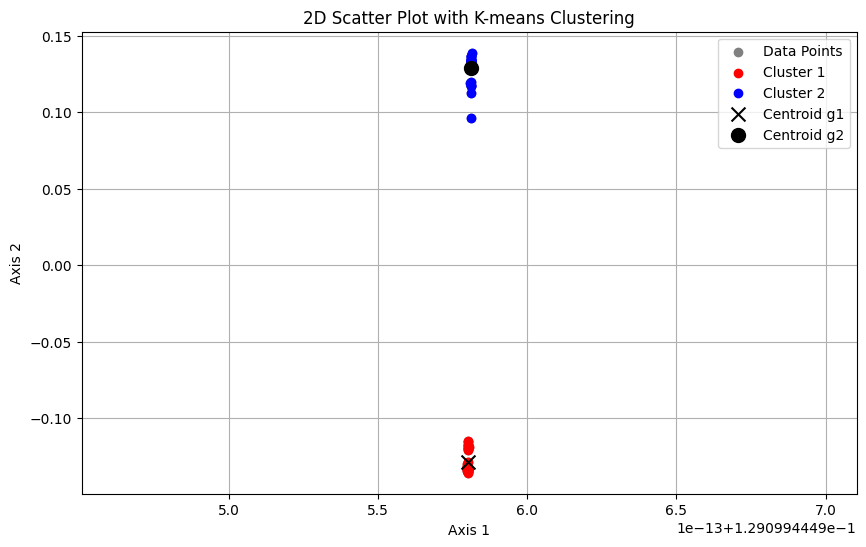

In [203]:
    # Plotting the original data points again
    plt.figure(figsize=(10, 6))
    plt.scatter(R[0, :], R[1, :], color='gray', label='Data Points')

    # Plotting the clusters
    plt.scatter(cluster1[0, :], cluster1[1, :], color='red', label='Cluster 1')
    plt.scatter(cluster2[0, :], cluster2[1, :], color='blue', label='Cluster 2')

    # Plotting the centroids
    plt.scatter(g1[0], g1[1], color='black', marker='x', s=100, label='Centroid g1')
    plt.scatter(g2[0], g2[1], color='black', marker='o', s=100, label='Centroid g2')

    plt.title('2D Scatter Plot with K-means Clustering')
    plt.xlabel('Axis 1')
    plt.ylabel('Axis 2')
    plt.legend()
    plt.grid(True)
    plt.show()